In [21]:
# import machine learning and data science libarires
import pandas as pd
import numpy as np

# import Google Finance API libraries
from googlefinance.client import get_price_data

# import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15, 5)

# import other libraries
import datetime as dt
import time

In [22]:
# set all the tickers: choose between: 'AAPL', 'MSFT', AMZN'
my_ticker = 'AAPL'

# set all the parameters
my_params = {
'q': my_ticker,    #stock symbol (ex: "AAPL")
'i': "86400",      #interval size in seconds ("86400" = 1 day intervals)
'x': "INDEXNASD",  #stock exchange symbol on which stock is traded (ex: "NASD")
'p': "5Y"          #period (ex: "1Y" = 1 year)
}

# build the dataframe of the stock data
my_stck = get_price_data(my_params)

# reset the indexes
#my_stck = my_stck.reset_index()

# print the head of my dataframe
print(my_stck.tail())

                       Open    High       Low   Close    Volume
2017-10-12 16:00:00  156.35  157.37  155.7299  156.00  16125054
2017-10-13 16:00:00  156.73  157.28  156.4100  156.99  16394188
2017-10-16 16:00:00  157.90  160.00  157.6500  159.88  24121452
2017-10-17 16:00:00  159.78  160.87  159.2300  160.47  18997275
2017-10-18 16:00:00  160.42  160.71  159.6000  159.76  16374164


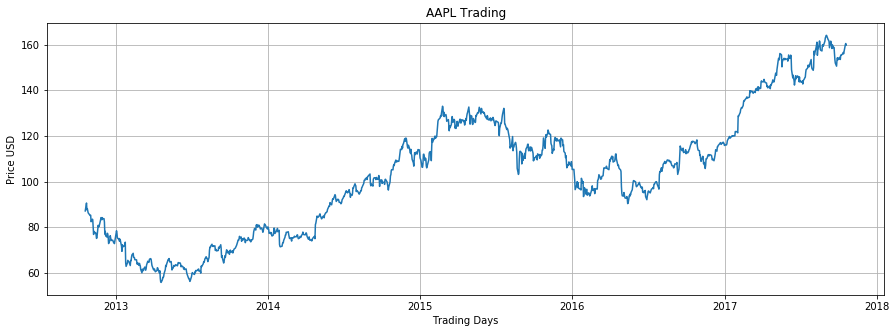

In [34]:
# plot data
fig, ax = plt.subplots()
ax.plot(my_stck.index, my_stck['Close'])
plt.grid()

# format the y-crd label
price = lambda y : '$%1.2f' % y
ax.format_ydata = price

# format the x-crd label
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title(my_ticker + ' Trading')

# set labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

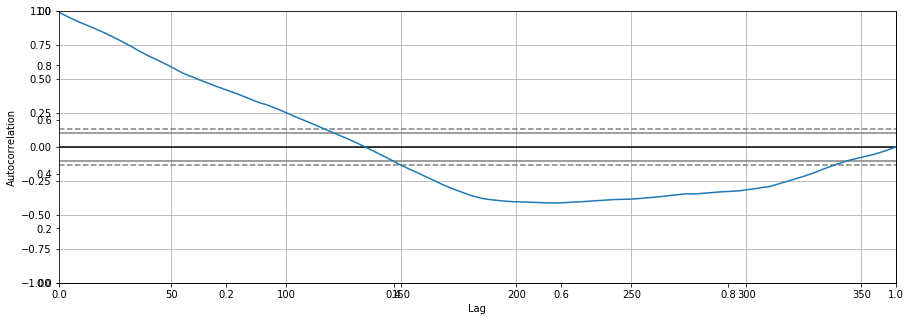

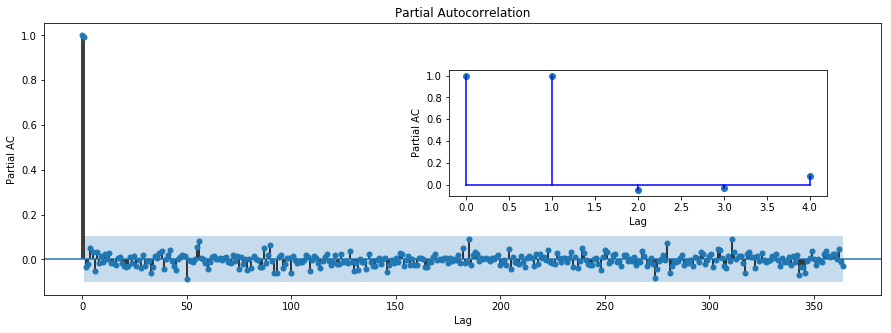

In [35]:
# my_series
my_series = my_stck['Close'][-365:]

#
from pandas.plotting import autocorrelation_plot as acf_pl
plt.subplots()

acf_pl(my_series)
plt.show()

#
#from statsmodels.graphics.tsaplots import plot_acf as acf_pl2
from statsmodels.graphics.tsaplots import plot_pacf as pacf_pl
pacf_pl(my_series)
plt.xlabel('Lag')
plt.ylabel('Partial AC')

#
from statsmodels.tsa.stattools import pacf

# Specify the axes
plt.axes([0.5,0.4,0.35,0.35])
plt.xlabel('Lag')
plt.ylabel('Partial AC')

# Plot the sliced series in red using the current axes
plt.stem(pacf(my_series)[:5], linefmt='b-', markerfmt='o', basefmt='b')
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


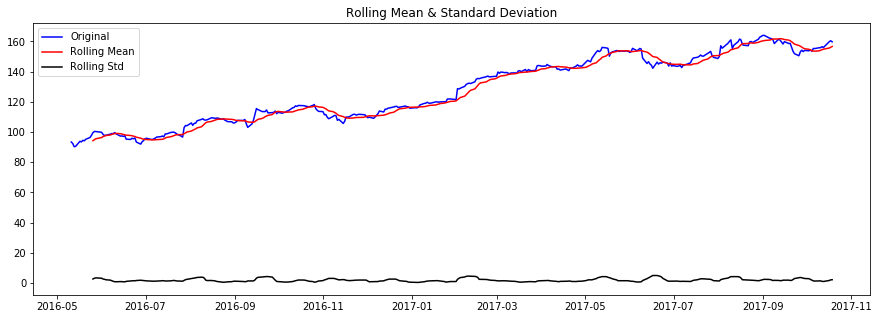

Results of Dickey-Fuller Test:
Test Statistic                  -0.799793
p-value                          0.819183
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window_val=12):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=window_val)
    rolstd = pd.rolling_std(timeseries, window=window_val)

    #Plot rolling statistics:
    plt.figure()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(my_series)

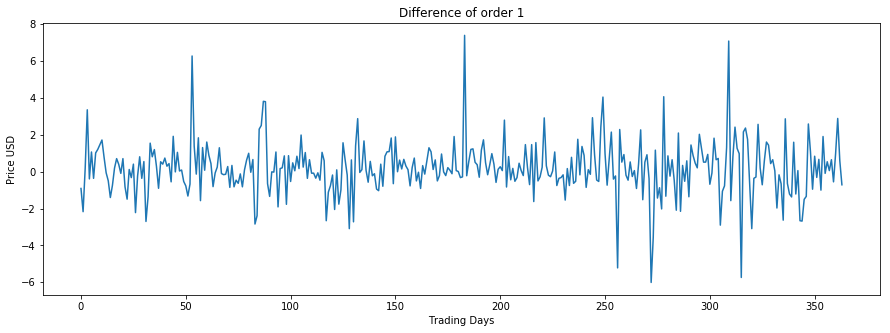

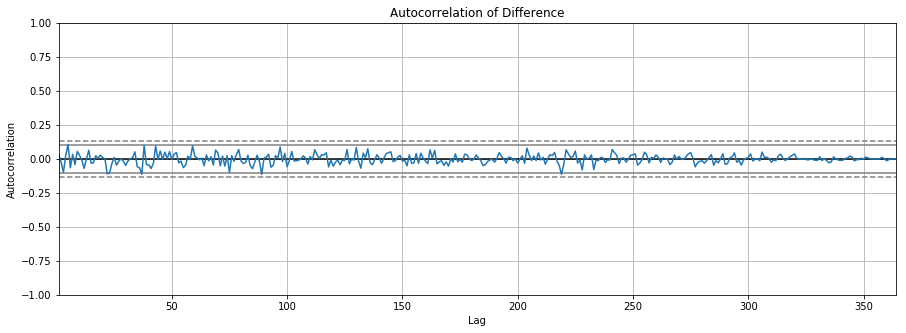

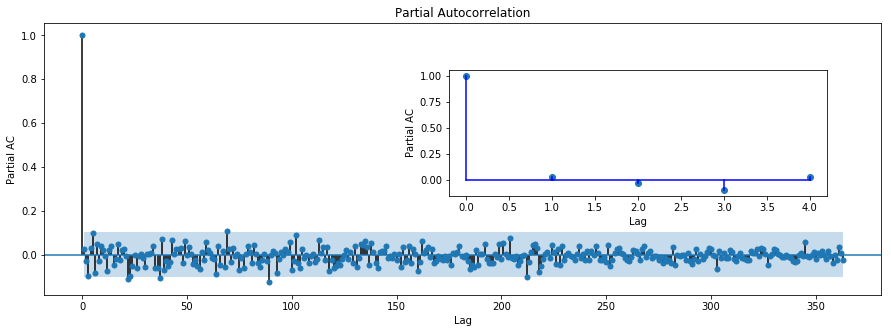

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


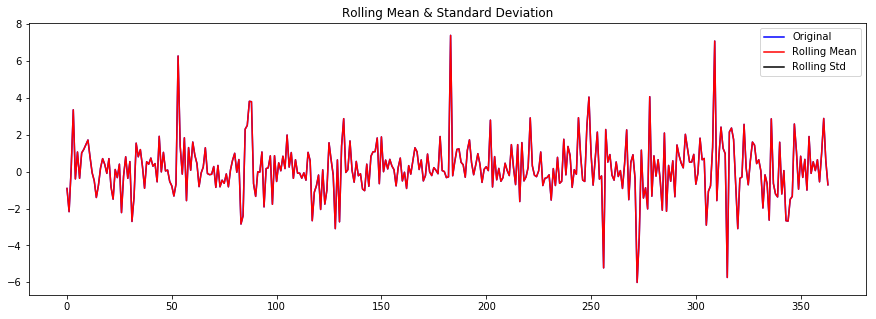

Results of Dickey-Fuller Test:
Test Statistic                -7.812778e+00
p-value                        6.997636e-12
#Lags Used                     5.000000e+00
Number of Observations Used    3.580000e+02
Critical Value (1%)           -3.448749e+00
Critical Value (5%)           -2.869647e+00
Critical Value (10%)          -2.571089e+00
dtype: float64


In [37]:
#
lag = 1
diff_values = my_series[lag:].values-my_series[:-lag].values
plt.title('Difference of order 1')
plt.plot(diff_values)
plt.ylabel('Price USD')
plt.xlabel('Trading Days')
plt.show()

acf_pl(diff_values)
plt.title('Autocorrelation of Difference')
plt.show()

#pacf_pl(diff_values)
#plt.xlabel('Lag')
#plt.ylabel('Partial AC')
#plt.show()

pacf_pl(diff_values)
plt.xlabel('Lag')
plt.ylabel('Partial AC')

# Specify the axes
plt.axes([0.5,0.4,0.35,0.35])
plt.xlabel('Lag')
plt.ylabel('Partial AC')

# Plot the sliced series in red using the current axes
plt.stem(pacf(diff_values)[:5], linefmt='b-', markerfmt='o', basefmt='b')
plt.show()

test_stationarity(diff_values, 1)

In [ ]:
"""
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations
at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations
due to the terms at shorter lags.
"""

In [245]:
#plt.scatter(list(range(0,len(diff_values))),np.sign(diff_values))
#plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  364
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -647.922
Method:                       css-mle   S.D. of innovations              1.435
Date:                Thu, 19 Oct 2017   AIC                           1311.845
Time:                        14:41:52   BIC                           1343.022
Sample:                    05-11-2016   HQIC                          1324.236
                         - 10-18-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1827      0.076      2.401      0.017       0.034       0.332
ar.L1.D.Close    -0.6567      0.212     -3.093      0.002      -1.073      -0.241
ar.L2.D.Close     0.0072      0.063     

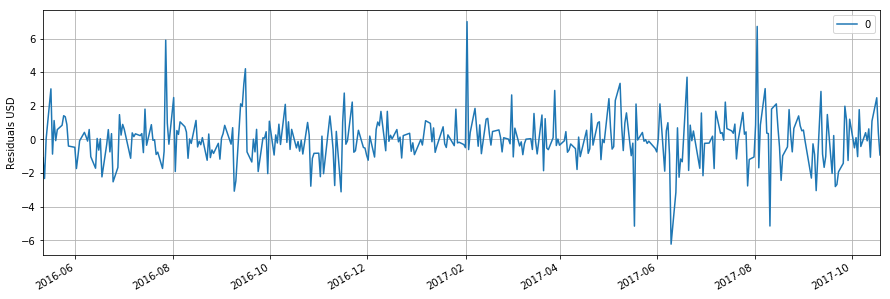

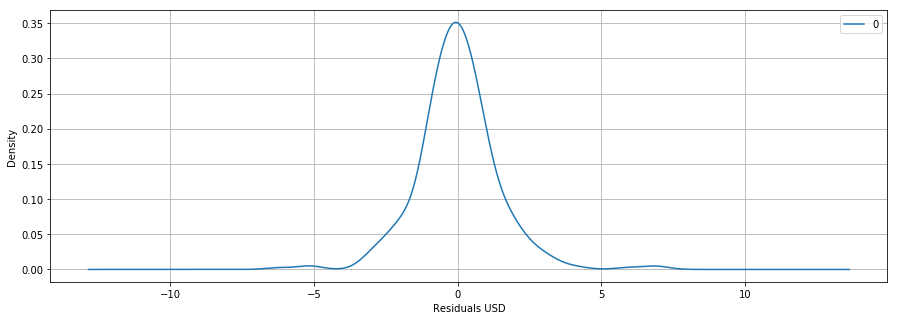

                0
count  364.000000
mean    -0.000773
std      1.436945
min     -6.225369
25%     -0.743631
50%     -0.059227
75%      0.661942
max      7.011724


In [70]:
#
from statsmodels.tsa.arima_model import ARIMA

# ARIMA parameters
arima_AR = 5
arima_diff = 1
arima_MA = 1

# fit model
model = ARIMA(my_series, order=(arima_AR,arima_diff,arima_MA))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.grid()
plt.ylabel('Residuals USD')
plt.show()

residuals.plot(kind='kde')
plt.xlabel('Residuals USD')
plt.grid()
plt.show()
print(residuals.describe())

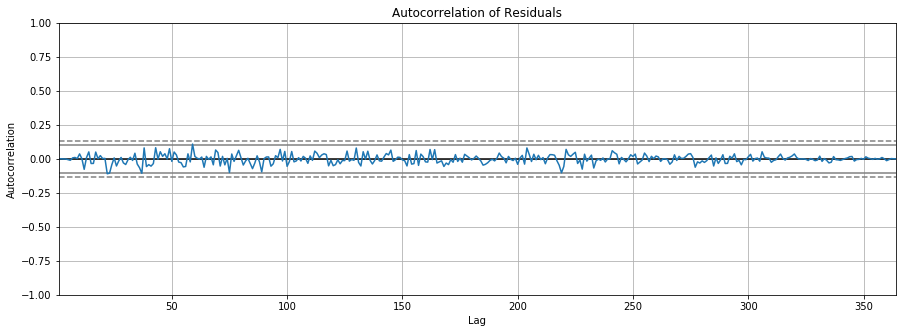

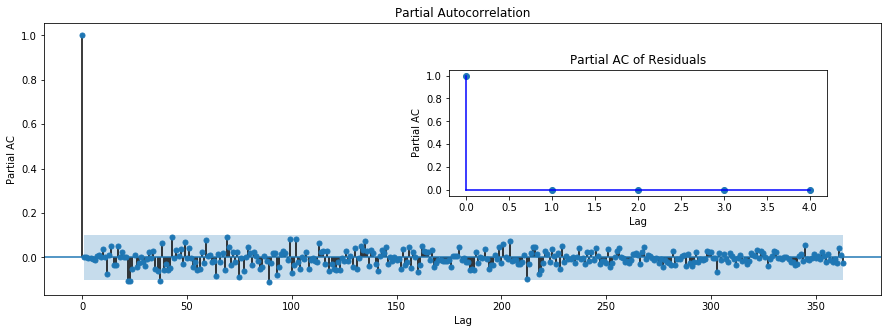

In [52]:
acf_pl(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

pacf_pl(residuals)
plt.xlabel('Lag')
plt.ylabel('Partial AC')

# Specify the axes
plt.axes([0.5,0.4,0.35,0.35])
plt.title('Partial AC of Residuals')


plt.xlabel('Lag')
plt.ylabel('Partial AC')

# Plot the sliced series in red using the current axes
plt.stem(pacf(residuals)[:5], linefmt='b-', markerfmt='o', basefmt='b')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error

X = my_series.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
size = len(X)-100
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(arima_AR,arima_diff,arima_MA))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=153.979250, expected=153.670000
predicted=153.833268, expected=152.760000
predicted=152.897762, expected=153.180000
predicted=153.459573, expected=155.450000
predicted=155.851489, expected=153.930000
predicted=154.083087, expected=154.450000
predicted=154.342445, expected=155.370000
predicted=155.756662, expected=154.990000
predicted=155.436520, expected=148.980000
predicted=148.718263, expected=145.420000
predicted=145.436930, expected=146.590000
predicted=147.654366, expected=145.160000
predicted=145.415488, expected=144.290000
predicted=143.746016, expected=142.270000
predicted=142.081995, expected=146.340000
predicted=146.685118, expected=145.010000
predicted=145.320084, expected=145.870000
predicted=145.526811, expected=145.630000
predicted=146.161180, expected=146.280000
predicted=146.429626, expected=145.820000
predicted=145.933264, expected=143.730000
predicted=143.868787, expected=145.830000
predicted=145.992819, expected=143.680000
predicted=144.218876, expected=144

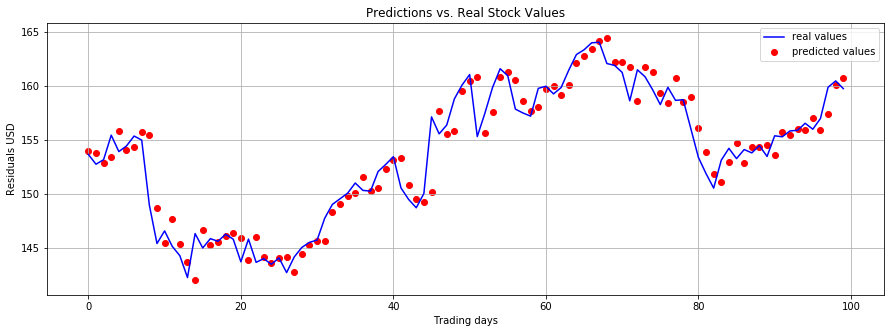

In [54]:
# plot
plt.subplots()
plt.plot(test, color='b', label='real values')
plt.scatter(list(range(0,len(predictions))) ,predictions, color='red', label='predicted values')
plt.title('Predictions vs. Real Stock Values')
plt.ylabel('Residuals USD')
plt.xlabel('Trading days')
plt.legend()
plt.grid()
plt.show()

In [55]:
def stock_variant(test_list):
    ans_ = test_list[1:]*100 - test_list[:-1]*100
    return np.sign(ans_*100)

test_var = stock_variant(np.array(test))
predict_var = stock_variant(np.array(predictions))

guesses = test_var*predict_var[0,:]
correctness = sum(guesses == 1)/(sum(guesses == 1)+sum(guesses == -1))*100

print('precision = %1.0f ' % (correctness))

precision = 45 
